This notebook contains code to assess goodness of fit of each posterior maximum likelihood mutation model using the KS test

In [1]:
%pylab inline
import sys
sys.path.append("/gymreklab-tscc/bonnieh/helper_functions")
from Joint_method_functions import *
import glob
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.ticker as ticker
import seaborn as sns
from statistics import mode
from scipy import stats

PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/figure2/'

Populating the interactive namespace from numpy and matplotlib


/storage/BonnieH/anaconda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Given file, get ABC lookup table
def getABCTable(file):
    num_bins = 0
    
    # Return list of lists that contain [s, het, common]
    table = GetABCList(file, num_bins)
    dic_summ_stats = {}
        
    # Fill in dic_summ_stats: Key is s, value is list of het, number of common alleles pairs for given s value
    for combo in table:
        s_round = get_LRT_bin(combo[0])
        if s_round not in dic_summ_stats:
            dic_summ_stats[s_round] = []
        dic_summ_stats[s_round].append([combo[1], combo[2]]) # Append het, number of common alleles for s value
    
    return dic_summ_stats

Running main
('AT', '11')
d
Median setting
d
Count
100
('AT', '12')
d
Median setting
d
Count
94
('AT', '13')
c
Median setting
d
Count
75
('AT', '14')
c
Median setting
c
Count
97
('AT', '15')
c
Median setting
c
Count
87
('AT', '16')
c
Median setting
c
Count
46
('AT', '17')
c
Median setting
c
Count
100
('AT', '18')
d
Median setting
c
Count
93
('AT', '19')
d
Median setting
c
Count
74
('AT', '20')
e
Median setting
c
Count
100
('AG', '11')
f
Median setting
f
Count
100
('AG', '12')
f
Median setting
f
Count
99
('AG', '13')
e
Median setting
e
Count
91
('AG', '14')
f
Median setting
e
Count
99
('AG', '15')
e
Median setting
e
Count
100
('AG', '16')
e
Median setting
e
Count
99
('AG', '17')
e
Median setting
e
Count
80
('AG', '18')
e
Median setting
e
Count
98
('AG', '19')
e
Median setting
e
Count
98
('AG', '20')
d
Median setting
d
Count
100
('AC', '11')
e
Median setting
e
Count
100
('AC', '12')
e
Median setting
f
Count
100
('AC', '13')
e
Median setting
e
Count
100
('AC', '14')
e
Median setting
e
Cou

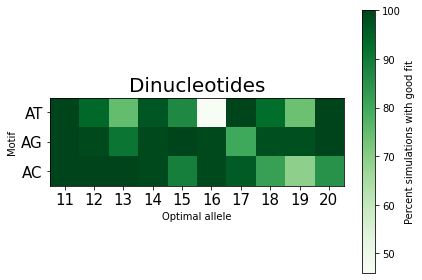

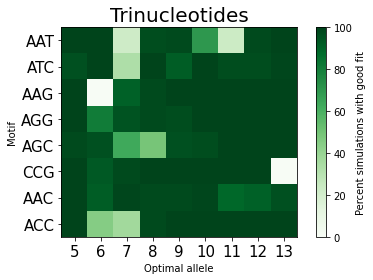

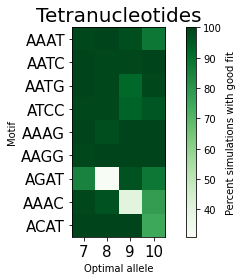

In [3]:
# Different colormap options: 'binary', 'hot_r', 'Blues', 'YlGnBu', 'Greens', 'viridis', 'cool'
    
x_axis = []
y_axis = []
pval_threshold = 0.05
goodness_of_fit_file = open('goodness_of_fit.txt','w')
    
print('Running main')
combos = [(2, 'intergenic'),(3, 'intergenic'),(4, 'intergenic')]
superfolder = 'results_intergenic_top_x'
subfolder =  '1kg_bin_agnostic_subsample_50_loci'#'1kg_bin_agnostic_071921'
colormap = 'Greens'
    
num_files_dict = {} # Key: Period, Value: Number of files
num_files_dict[2] = 30
num_files_dict[3] = 72
num_files_dict[4] = 36
    
opt_dic = {}
opt_dic[2] = ['11','12','13','14','15','16','17','18','19','20']
opt_dic[3] = ['05','06','07','08','09','10','11','12','13']
opt_dic[4] = ['07','08','09','10']
    
    
motif_dic = {}
motif_dic[2] = ['AT','AG','AC']
motif_dic[3] = ['AAT','ATC','AAG','AGG','AGC','CCG','AAC','ACC'] 
motif_dic[4] = ['AAAT','AATC','AATG','ATCC','AAAG','AAGG','AGAT','AAAC','ACAT']
    
mut_setting_dic = {}
mut_setting_dic[2] = ['a','b','c','d','e','f']
mut_setting_dic[3] = ['a','b','c','d','e','f','g']
mut_setting_dic[4] = ['a','b','c','d','e','f','g']
    
file_name_dic = {}
file_name_dic[2] = 'dinuc'
file_name_dic[3] = 'trinuc'
file_name_dic[4] = 'tetranuc'
    
for combo in combos:
        
    per = combo[0]
    list_of_percents = []
    list_of_num_loci = []
    list_of_pvalue= []

    # Plot heatmap for each motif in given period
    for i in range(0,1):
        for motif in motif_dic[per]:
            for opt in opt_dic[per]:
                file_list = glob.glob('/gymreklab-tscc/bonnieh/joint_method/%s/%s/per_%d_*%s*opt_%s.txt'%(superfolder, subfolder, per, motif, opt))
                    
                if 1>0:
                    filename = file_list[0]
                    results_file = open(filename, 'r')
                        
                    for k in range(0, 2):
                        line= results_file.readline()
                        
                    info = line.strip().split(': ')
                    num_loci = info[1]
                    num_loci = num_loci.strip().split(' ')
                    num_loci = int(num_loci[0])
                        
                    list_of_num_loci.append(num_loci)
                        
                    if num_loci == 0:
                           
                        for elem in mut_setting_dic[per]:
                            list_of_percents.append(0)
                        list_of_pvalue.append(0)
                        #x_axis.append(num_loci)
                        #y_axis.append(0)
                        
                    else:
                        if opt[0] == '0':
                            opt_num=int(opt[1]) 
                        else:
                            opt_num=int(opt)
                            
                        header = results_file.readline().strip().split('\t')
                        info = results_file.readline().strip().split(': ')

                        list_het = info[1]
                        list_het = list_het[1:]
                        list_het = list_het[:-1]
                        het_list = list_het.strip().split(', ')

                        obs_het_distr = []
                        opt_allele_sub_list = []
                        for elem in het_list:
                            obs_het_distr.append(float(elem))
                            opt_allele_sub_list.append((per, opt_num))
                        
                        for k in range(0, 2):
                            line= results_file.readline()
                        info = line.strip().split(': ')
                        list_settings = info[1]
                        list_settings = list_settings.strip().split(', ')
                            
                        for elem in mut_setting_dic[per]:
                            num_acc = list_settings.count(elem)
                                
                            list_of_percents.append(num_acc)
                            
                        # Find mode of list_settings:
                        #mode_setting = mode(list_settings)
                        #print(stats.mode(list_settings))
                        mode, count = stats.mode(list_settings)
                        mode_setting = mode[0]
                        sorted_settings = sorted(list_settings)
                        median_setting = list_settings[249]
                            
                        print((motif,opt))
                        print(mode_setting)
                        print('Median setting')
                        print(median_setting)
                        #mode_setting = median_setting
                                
                        goodness_of_fit_file.write(motif + '\t' + str(opt_num) + '\t' + mode_setting + '\n')
                        #obs_het_distr, opt_allele_sub_list = GetObsHetDistrFn(motif, opt_num)
                            
                        # Get simulated heterozygosity

                        mut_setting_folder_name = {}
                        mut_setting_folder_name[2] = 'eurodem_prior2_dinuc_'
                        mut_setting_folder_name[3] = 'eurodem_prior2_trinuc_'
                        mut_setting_folder_name[4] = 'eurodem_prior2_tetranuc_'

                        folder_prefix = mut_setting_folder_name[len(motif)]
                            
                        file = '/gymreklab-tscc/bonnieh/abc/results/' + folder_prefix + mode_setting + '_1kg_euro/' + str(len(motif)) + '_' + str(opt_num) + '.txt'

                        ABC_dic = {}
                        ABC_dic[opt_num] = getABCTable(file)
                            
                        ABC_tables_mut = ABC_dic
                        count = 0
                        for zz in range(0, 100):
                            sim_het_list, sim_common_list = GetLists(ABC_tables_mut, opt_allele_sub_list, 2, 10**-3)
                            if len(obs_het_distr) != len(sim_het_list):
                                print('Observed and simulated het different lengths')
                            ks_stat, pval = stats.ks_2samp(obs_het_distr, sim_het_list)
                            if pval > pval_threshold:
                                count = count + 1
                            #if pval < 0.05:
                                #list_of_pvalue.append(0)
                            #else:
                                #list_of_pvalue.append(1)
                                    
                        list_of_pvalue.append(count)
                        x_axis.append(num_loci)
                        y_axis.append(count)
                        print('Count')
                        print(count)
                            
                    results_file.close()
    matrix = np.zeros((len(motif_dic[per]), len(opt_dic[per])))
    #print(matrix)
    counter = 0

    for i in range(len(motif_dic[per])): 
        for j in range(len(opt_dic[per])):
            #print(i,j)
            matrix[i,j] = list_of_pvalue[counter]
            counter = counter + 1

    # Visualize heatmap

    print(matrix)
        
    opt = []
        
    for opt_num in opt_dic[per]:
        if opt_num[0] == '0':
            opt.append(opt_num[1]) #mot + ' ' 
        else:
            opt.append(opt_num)

    print(matrix)
    fig, ax = plt.subplots()
        
    im = ax.imshow(matrix,cmap=colormap) 
    cbar = fig.colorbar(im)
    cbar.ax.set_ylabel('Percent simulations with good fit')

    # Show all ticks
    ax.set_xticks(np.arange(len(opt)))
    ax.set_yticks(np.arange(len(motif_dic[per])))

    # Label ticks
    ax.set_xticklabels(opt)
    ax.set_yticklabels(motif_dic[per])

    if per == 2:
        ax.set_title('Dinucleotides',fontsize=20)
    if per == 3:
        ax.set_title('Trinucleotides',fontsize=20)
    if per == 4:
        ax.set_title('Tetranucleotides',fontsize=20)
    ax.set_ylabel('Motif')
    ax.set_xlabel('Optimal allele')
        
    #plt.savefig(PLOTDIR + 'mut_heatmap_%d_%s_ks_test.pdf'%(per, combo[1]),bbox_inches='tight')
    #plt.savefig(PLOTDIR + 'subsample_mut_heatmap_%d_%s_ks_test.pdf'%(per, combo[1]),bbox_inches='tight')
    plt.savefig(PLOTDIR + 'subsample_mut_heatmap_%d_%s_ks_test_rep_2.pdf'%(per, combo[1]),bbox_inches='tight')
    plt.yticks(size=15)
    plt.xticks(size=15)
    fig.tight_layout()
goodness_of_fit_file.close()

Text(0.5, 1.0, '86.86% of loci classes have >80% simulations with good fit')

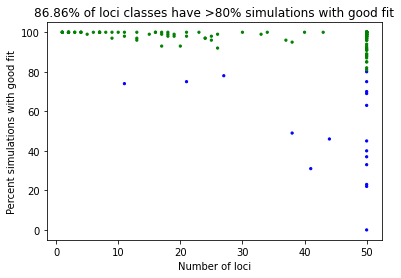

In [4]:
plt.figure(10)
color_list = []
for value in y_axis:
    if value > 80:
        color_list.append('green')
    else:
        color_list.append('blue')
plt.scatter(x_axis,y_axis,s=5,c=color_list)
plt.xlabel('Number of loci')
plt.ylabel('Percent simulations with good fit')
plt.title(str(round(color_list.count('green')/len(color_list)*100,2)) + '% of loci classes have >80% simulations with good fit') 